In [2]:
# Loading the libraries
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(Matrix))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(repr))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(RColorBrewer))
set.seed(42)

In [3]:
# Assigning the RDS file direction
pbmc_RDS_file_direction <- "/home/arsham79/scratch/nsclc/results/pbmc_cell_type_annotated.rds"

In [ ]:
# Reading Seurat object
pbmc <- readRDS(pbmc_RDS_file_direction)

In [ ]:
options(repr.plot.width=6, repr.plot.height=6) # Adjusting the plot size
DimPlot(pbmc, reduction = "umap", raster = FALSE, label = TRUE, label.size = 3) + ggtitle("seurat_clusters") + NoLegend()

In [ ]:
features_marker <- c(
    "HBB","HBM", # Erythroid-like and erythroid precursor cells
    "CCL21","MMRN1", # Platelets
    "AGER","EMP2", # Pulmonary alveolar type I cells
    "CAPS","C20orf85", # Ciliated cells
    #"CD1B","CCL17", # Dendritic cells
    "MUC15","SCGB3A1", # Club cells
    "CD3D", "TRAC", # T cells CD4
    "MZB1","JCHAIN", # Plasma cells
    "SFTPB","MDK", # Pulmonary alveolar type II like cells
    "COL1A1","COL1A2", # Fibroblasts
    "EPAS1","VWF", # Endothelial cells
    "S100A12","FCGR3B", # Monocytes
    "SFTPC","NAPSA", # Pulmonary alveolar type II cells
    "CPA3","TPSAB1", # Mast cells
    "LYZ","C1QA", # Myeloid
    "MARCO","CD68", #Macrophages
    "MS4A1","CD79A", # B cells
    "S100A8","C5AR1", # Neutrophils
    "NKG7","GNLY" # NK cells
   )

In [ ]:
options(warn = -1) # Turning off the warning
options(repr.plot.width=18, repr.plot.height=8) # Adjusting the plot size


VlnPlot(pbmc, features = features_marker, pt.size = 0, raster = FALSE, stack = TRUE)  + NoLegend() + NoGrid()

options(warn = 1) # Turning on the warning again

In [ ]:
options(warn = -1) # Turning off the warning
options(repr.plot.width=18, repr.plot.height=7) # Adjusting the plot size

DotPlot(pbmc, features = features_marker) + theme(axis.text.x = element_text(angle = 45, hjust = 1))

options(warn = 1) # Turning on the warning again

In [ ]:
new_tumor_stage <- data.table(new_tumor_stage = c("1. Normal", "2. 0", "3. I", "4. II", "5. III", "6. IV"),
                             tumor_stage = c("N", "0", "I", "II", "III", "IV"))

old_tumor_stage <- data.table(tumor_stage = pbmc@meta.data$tumor_stage)

new_tumor_stage <- merge(old_tumor_stage, new_tumor_stage, by = "tumor_stage", sort = FALSE)

pbmc@meta.data$tidy_tumor_stage <- new_tumor_stage$new_tumor_stage

In [ ]:
options(repr.plot.width=18, repr.plot.height=6) # Adjusting the plot size

DimPlot(pbmc, reduction = "umap", raster = FALSE, label = FALSE, split.by = "tidy_tumor_stage", repel = 2) + NoLegend()

In [ ]:
new_tumor_stage <- data.table(new_tumor_stage = c("1. Normal", "2. 0", "3. I", "4. II and III", "4. II and III", "5. IV"),
                             tumor_stage = c("N", "0", "I", "II", "III", "IV"))

old_tumor_stage <- data.table(tumor_stage = pbmc@meta.data$tumor_stage)

In [ ]:
new_tumor_stage <- merge(old_tumor_stage, new_tumor_stage, by = "tumor_stage", sort = FALSE)

In [ ]:
pbmc@meta.data$new_tumor_stage <- new_tumor_stage$new_tumor_stage

In [ ]:
options(repr.plot.width=18, repr.plot.height=6) # Adjusting the plot size

DimPlot(pbmc, reduction = "umap", raster = FALSE, label = FALSE, split.by = "new_tumor_stage") + NoLegend()

In [ ]:
options(repr.plot.width=18, repr.plot.height=6) # Adjusting the plot size

p1 <- DimPlot(pbmc, reduction = "umap", raster = FALSE, label = FALSE, group.by = "GEO", repel = 2) + NoLegend()
p2 <- DimPlot(pbmc, reduction = "umap", raster = FALSE, label = FALSE, group.by = "GSM", repel = 2) + NoLegend()
p3 <- DimPlot(pbmc, reduction = "umap", raster = FALSE, label = FALSE, group.by = "tidy_tumor_stage", repel = 2)

grid.arrange(p1, p2, p3, nrow = 1)

In [ ]:
bar_plot_dt <- data.table(cell_type = pbmc@active.ident,
               barcode = rownames(pbmc@meta.data),
               stage = pbmc@meta.data$new_tumor_stage,
               sample = pbmc@meta.data$GSM)

ggplot(bar_plot_dt, aes(x = sample, fill = cell_type)) + 
    geom_bar(position = "fill") + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [ ]:
bar_plot_dt <- data.table(cell_type = pbmc@active.ident,
               barcode = rownames(pbmc@meta.data),
               stage = pbmc@meta.data$new_tumor_stage,
               sample = pbmc@meta.data$GSM)

ggplot(bar_plot_dt, aes(x = sample, fill = cell_type)) + 
    geom_bar(position = "fill") + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

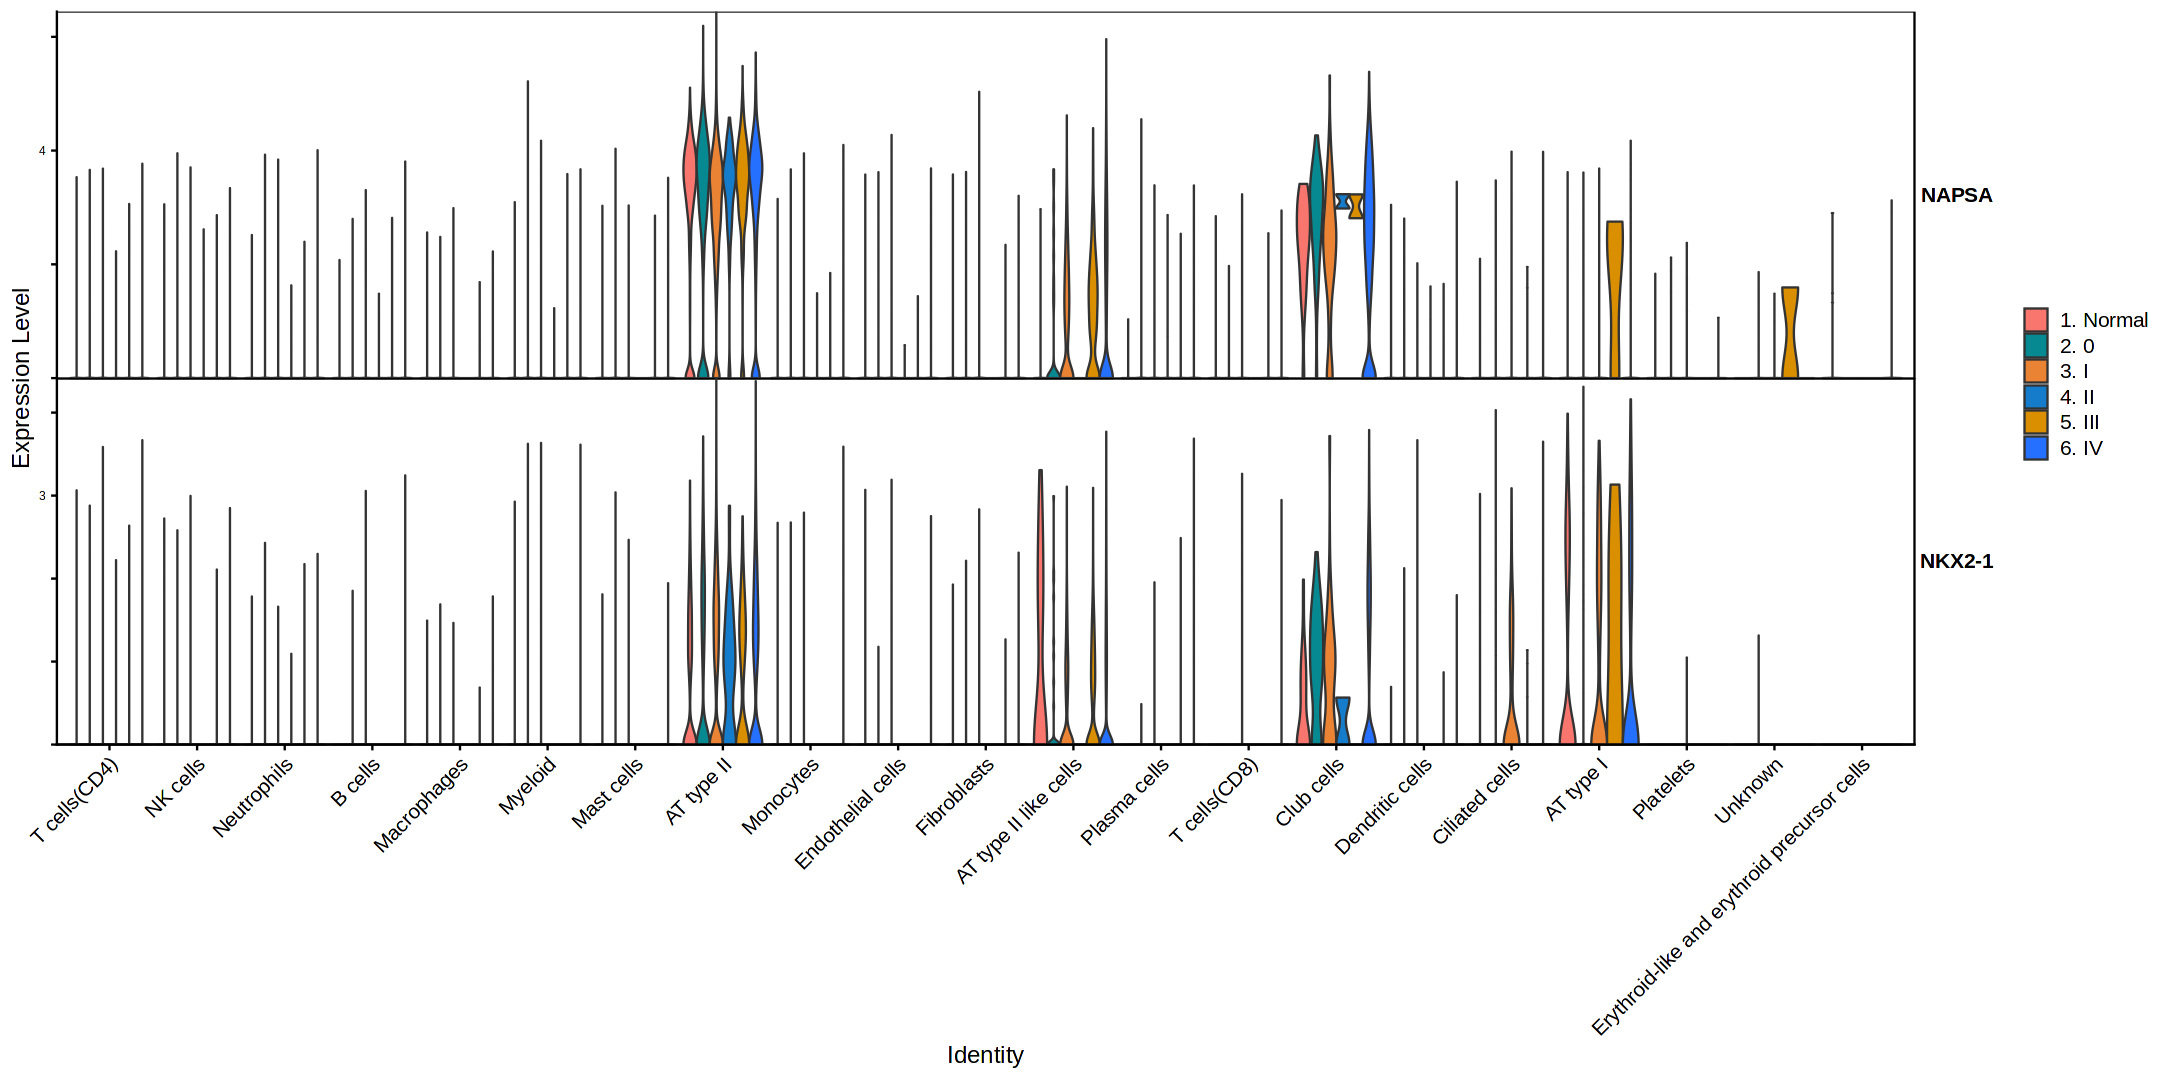

In [26]:
options(repr.plot.width=18, repr.plot.height=9) # Adjusting the plot size
options(warn = -1)

VlnPlot(object = pbmc, features = c("NAPSA","NKX2-1"), split.by = "tidy_tumor_stage", pt.size = 0, raster = FALSE, stack = TRUE, flip = TRUE)

options(warn = 1)

In [19]:
pbmc_lung <- subset(pbmc, idents =  c("AT type II", "AT type I", "AT type II like cells", "Club cells", "Ciliated cells"))

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”

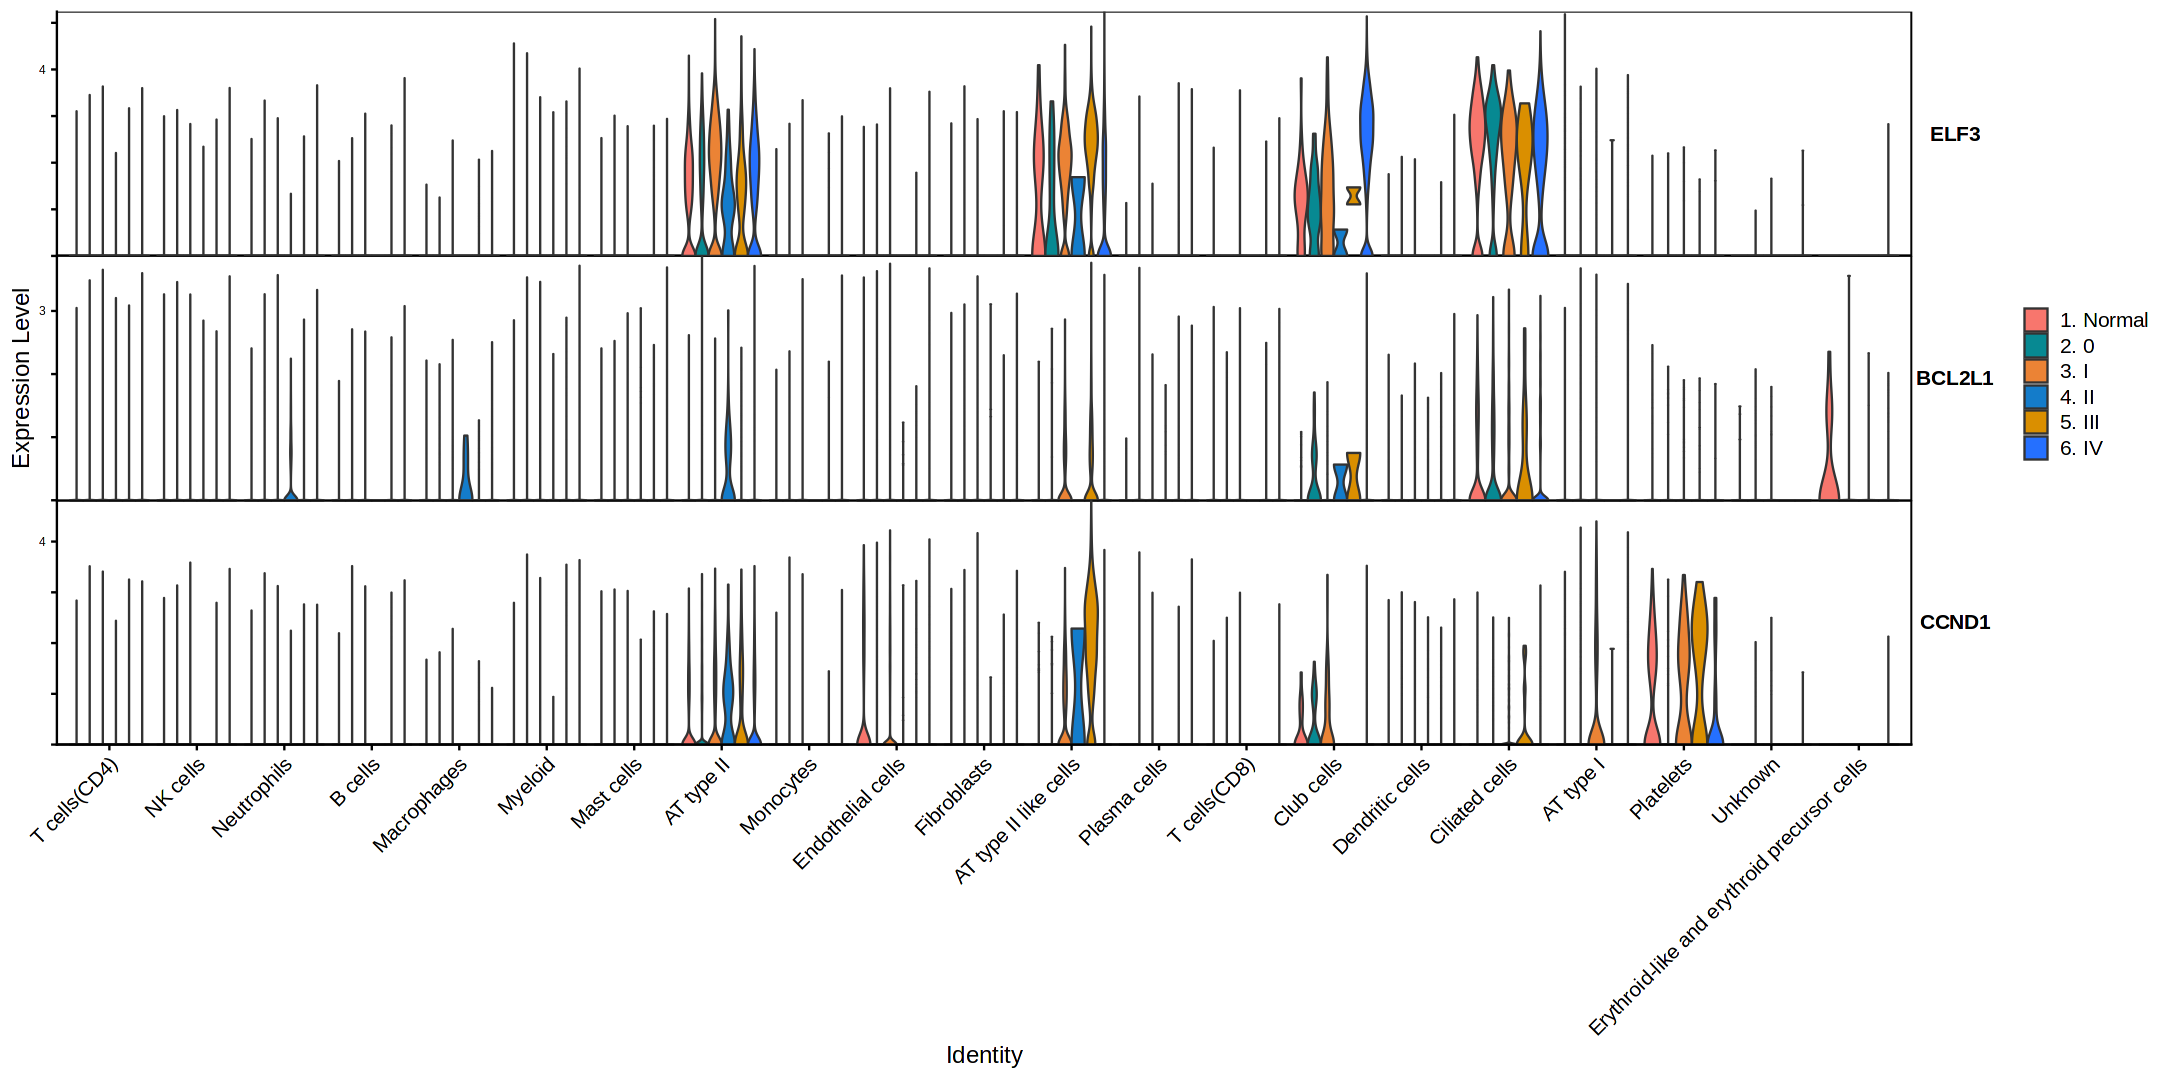

In [27]:
VlnPlot(object = pbmc, features = c("ELF3","BCL2L1", "CCND1"), split.by = "tidy_tumor_stage", pt.size = 1, stack = TRUE, flip = TRUE)

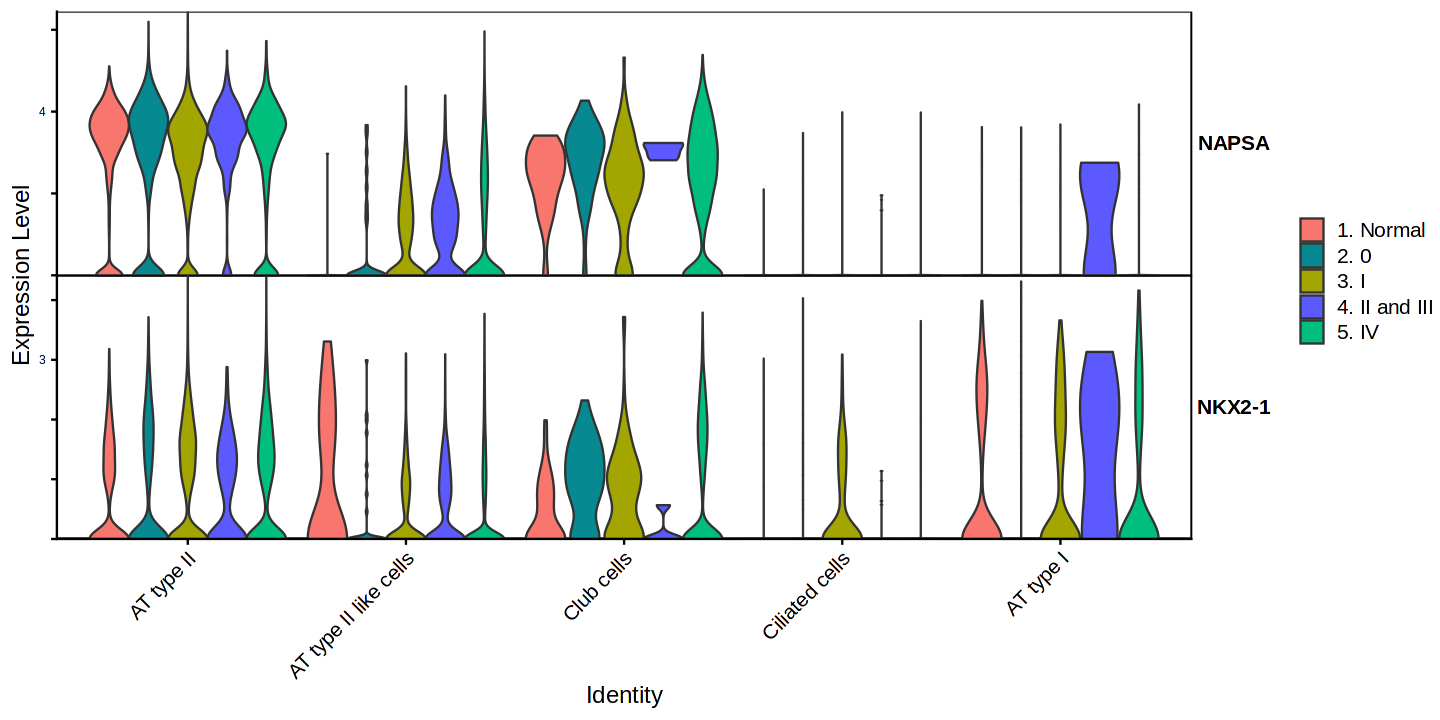

In [76]:
options(repr.plot.width=12, repr.plot.height=6) # Adjusting the plot size
options(warn = -1)

VlnPlot(object = pbmc_lung, features = c("NAPSA","NKX2-1"), split.by = "new_tumor_stage", pt.size = 0, raster = FALSE, stack = TRUE, flip = TRUE)

options(warn = 1)

In [23]:
# Creating database

lung_cells <- data.table(names = c("AT type II", "AT type I", "AT type II like cells", "Club cells", "Ciliated cells"),
                         IDs = c("pbmc_at_ii", "pbmc_at_i", "pbmc_at_ii_like", "pbmc_club_cells", "pbmc_clilated_cells"))


# Subsetting the meta data to get barcode, stage, and cell_type

ident_switch_OG <- data.table(brc = rownames(pbmc@meta.data),
                          stage = pbmc@meta.data$new_tumor_stage, # You can change to normal tumor stage or the Alternative one
                          cell_type = pbmc@active.ident)

for(i in 1:nrow(lung_cells)){
    

    # Subsetting the pbmc object
    sub_pbmc <- subset(pbmc, idents = lung_cells[,names][i])
    
    # Using original version
    ident_switch <- ident_switch_OG
    
    # Getting current barcode from subset object
    current_brc <- data.table(brc = rownames(as.matrix(sub_pbmc@active.ident)))
    
    # Merged datatable having only suset barcodes
    ident_switch <- merge(current_brc, ident_switch, by = "brc", sort = FALSE)
    
    # Convert to factor
    new_ident <- factor(ident_switch$stage)
    names(new_ident) <- ident_switch$brc
    
    # Assign the new ident to subseted object
    sub_pbmc@active.ident <- new_ident
    
    # Assign it as a new Seurat object
    assign(x = lung_cells[,IDs][i], value = sub_pbmc)
    
    # log messaging
    print(paste0(lung_cells[,IDs][i], "  has been assigned"))

}

[1] "pbmc_at_ii  has been assigned"
[1] "pbmc_at_i  has been assigned"
[1] "pbmc_at_ii_like  has been assigned"
[1] "pbmc_club_cells  has been assigned"
[1] "pbmc_clilated_cells  has been assigned"


In [24]:
options(warn = -1)

suppressMessages({

        at_ii_markers <- FindAllMarkers(object = pbmc_at_ii)
        at_i_markers <- FindAllMarkers(object = pbmc_at_i)
        at_ii_like <- FindAllMarkers(object = pbmc_at_ii_like)
        club_cells <- FindAllMarkers(object = pbmc_club_cells)
        clilated_cells <- FindAllMarkers(object = pbmc_clilated_cells)
    
    })

options(warn = 1)

## pbmc_club_cells

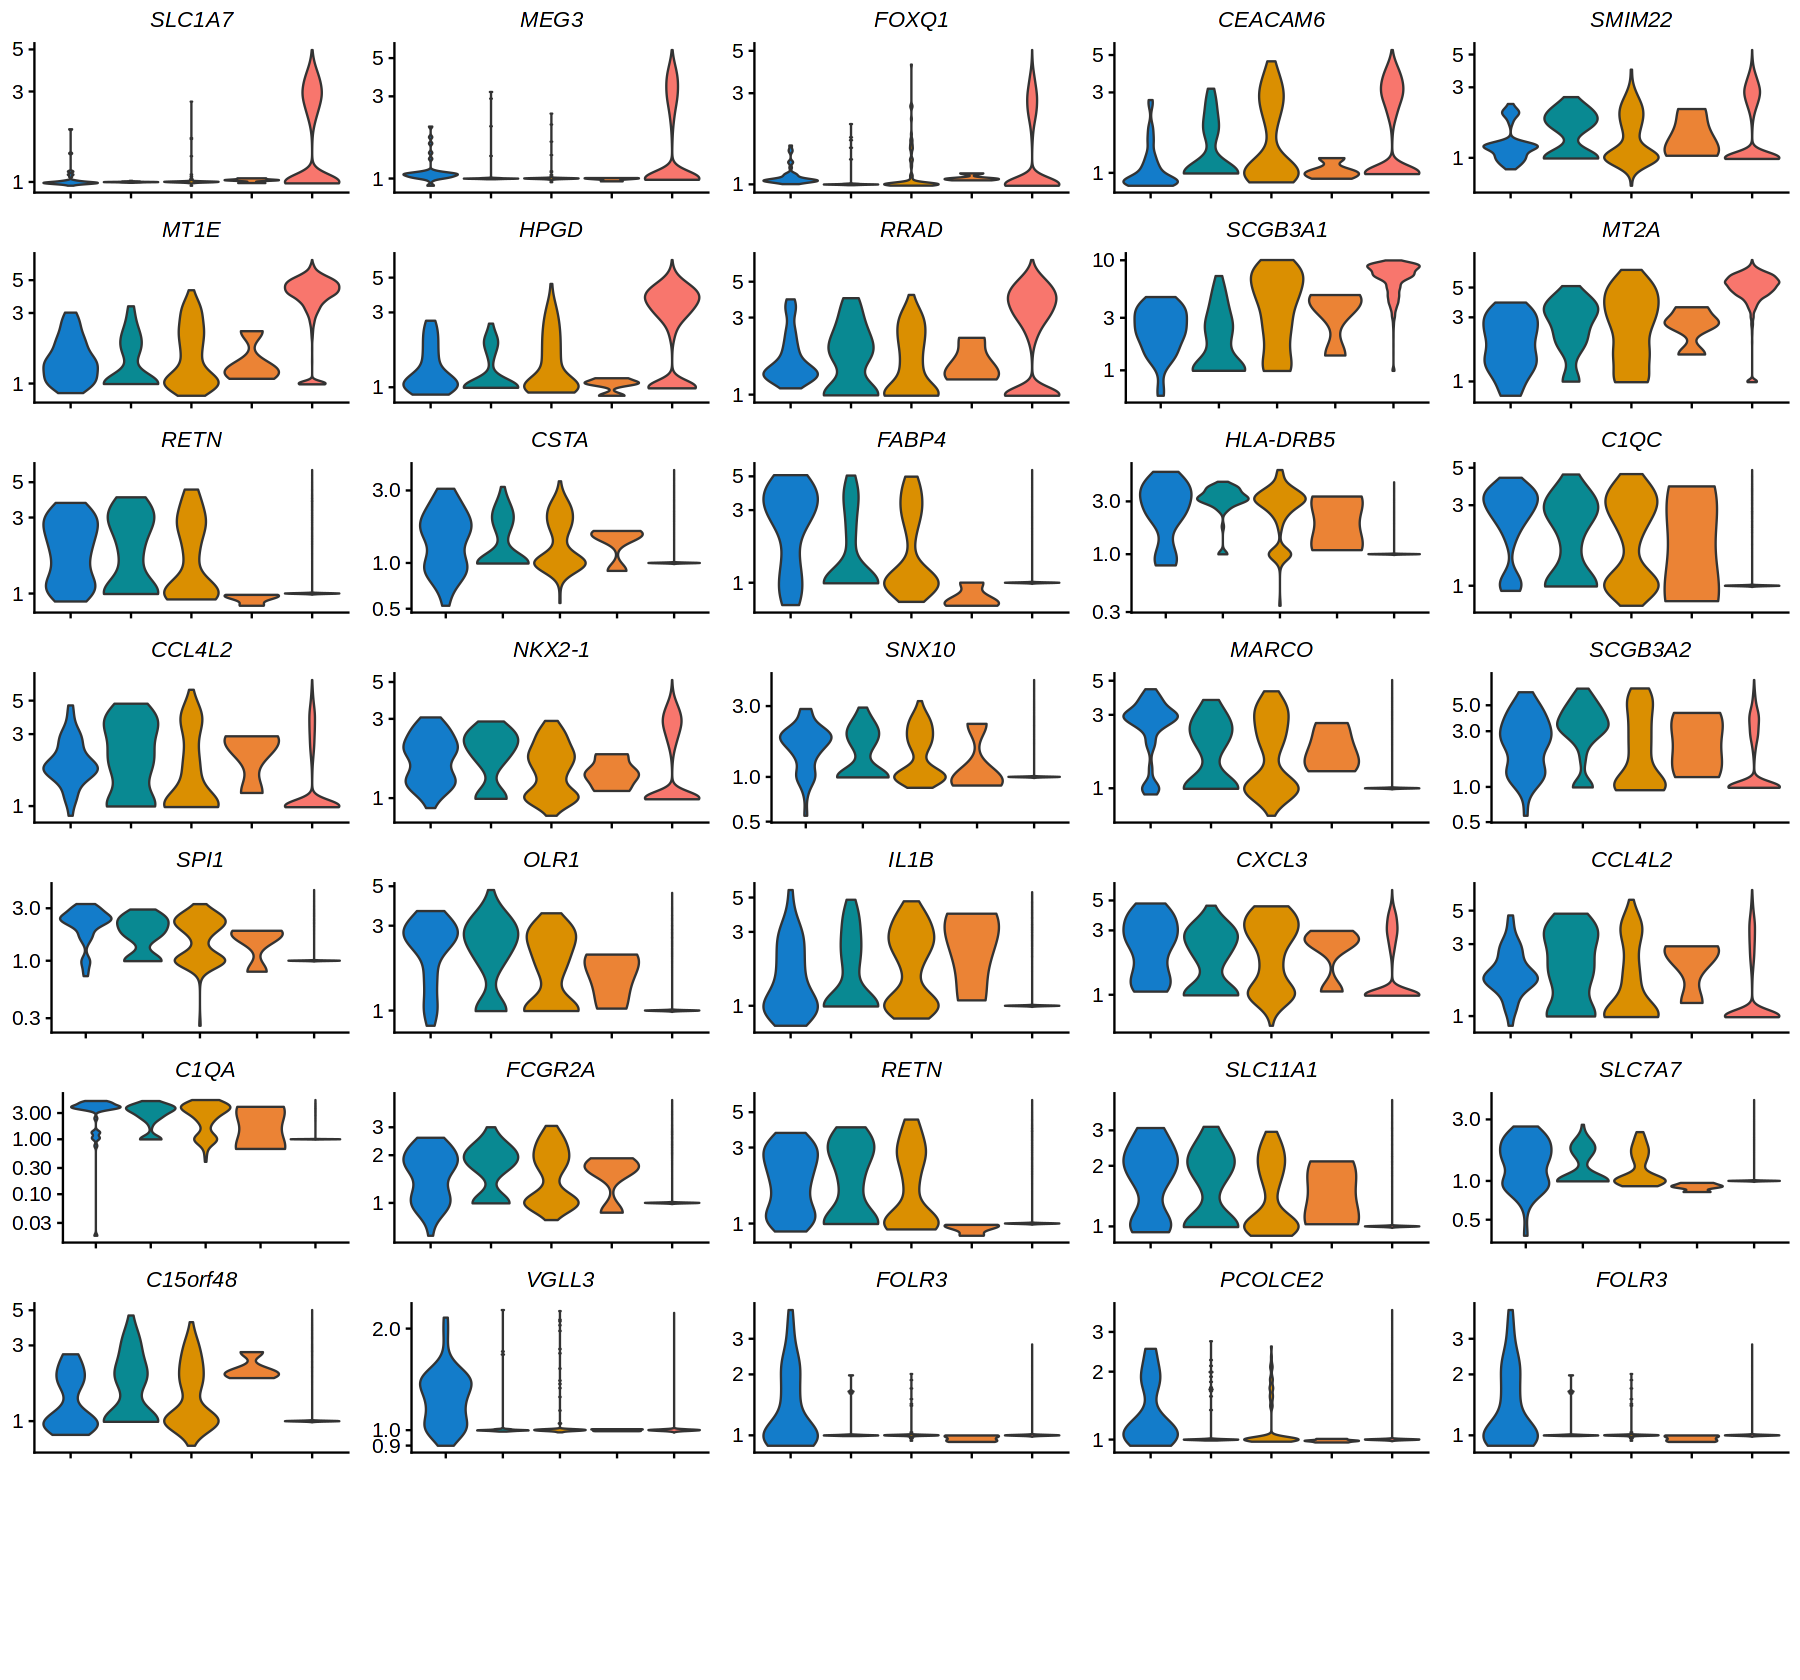

In [52]:
# Adjust plot size
options(repr.plot.width=15, repr.plot.height=14)
options(warn = -1)

# Define your palette
my_palette <- c("#137CCA", "#098992", "#DA8F01", "#EB8335", "#F8766D")

# Function to generate violin plots
generate_violin_plot <- function(feature) {
  plot <- VlnPlot(object = pbmc_club_cells, features = feature, pt.size = 0, log = T) +
    NoLegend() +
    scale_fill_manual(values = my_palette) +
    theme(axis.title.y = element_blank(), axis.title.x = element_blank(), axis.text.x = element_blank(), 
          plot.title = element_text(face = "italic", family = "sans", size = 13))
    
  return(plot)
}

# List of features
features <- c(# Oncogenes:
              "SLC1A7", "MEG3", "FOXQ1", 
              "CEACAM6", "SMIM22", "MT1E", "HPGD",  "RRAD",
              "SCGB3A1", "MT2A", 
              # Tumor suppressors:
              "RETN", "CSTA", "FABP4", "HLA-DRB5", "C1QC", 
              "CCL4L2", "NKX2-1", "SNX10", "MARCO", "SCGB3A2", 
              "SPI1", "OLR1", "IL1B", "CXCL3", "CCL4L2", 
              "C1QA", "FCGR2A", "RETN", "SLC11A1", "SLC7A7", 
              "C15orf48", "VGLL3", "FOLR3", "PCOLCE2", "FOLR3")

# Generate violin plots
plots <- lapply(features, generate_violin_plot)

# Combine plots using grid.arrange
grid.arrange(grobs = plots, nrow = 8)

# Turn the warning on again
options(warn = 1)

## pbmc_at_ii_like

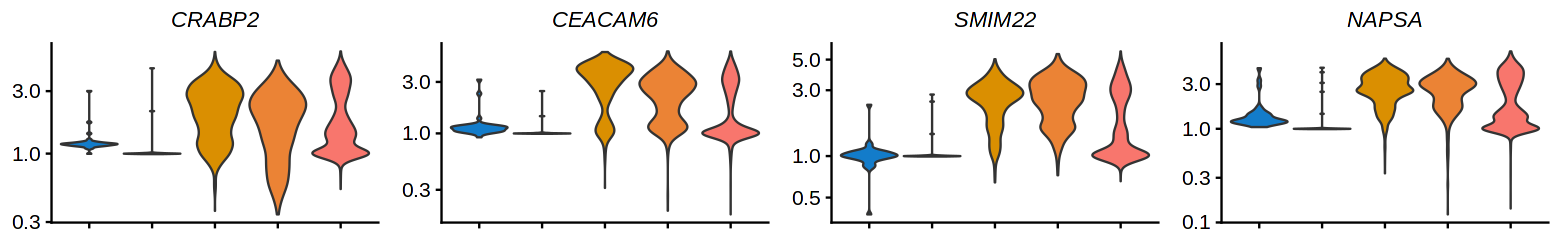

In [50]:
# Adjust plot size and warning settings
options(repr.plot.width=13, repr.plot.height=2)
options(warn = -1)

# Define your palette
my_palette <- c("#137CCA", "#098992", "#DA8F01", "#EB8335", "#F8766D")

# Function to generate violin plots
generate_violin_plot <- function(feature) {
  plot <- VlnPlot(object = pbmc_at_ii_like, features = feature, pt.size = 0, log = T) +
    NoLegend() +
    scale_fill_manual(values = my_palette) +
    theme(axis.title.y = element_blank(), axis.title.x = element_blank(), axis.text.x = element_blank(), 
          plot.title = element_text(face = "italic", family = "sans", size = 13))
    
  return(plot)
}

# List of features
features <- c("CRABP2", "CEACAM6", "SMIM22", "NAPSA")
              
# Generate violin plots
plots <- lapply(features, generate_violin_plot)

# Combine plots using grid.arrange
grid.arrange(grobs = plots, nrow = 1)

# Turn the warning on again
options(warn = 1)